In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
import datetime
from datetime import date
from import_google_drive import download_file_from_google_drive

download_file_from_google_drive('1Yr_aftIVvaHzgSyetvHUXPw58pXNP8vJ', './data/file.xls')

mbm_data_AM = pd.read_excel("./data/file.xls", sheet_name="AEREO MISCELANEOS", skiprows=6)

mbm_data_AM = mbm_data_AM[~np.isnan(mbm_data_AM["N° WAREHOUSE"])]

mbm_data_MM = pd.read_excel("./data/file.xls", sheet_name="MARITIMO MISCELANEOS ", skiprows=6)

mbm_data_MM = mbm_data_MM[~np.isnan(mbm_data_MM["N° WAREHOUSE"])]

mbm_data_AM = mbm_data_AM.iloc[:, 1:]
mbm_data_MM =  mbm_data_MM.iloc[:, 0:12]
mbm_data_AM["TIPO_DE_ENVIO"] = 'AEREO'
mbm_data_MM["TIPO_DE_ENVIO"] = 'MARITIMO'
mbm_data = pd.concat([mbm_data_AM, mbm_data_MM])
mbm_data["GROSS WEIGHT (Ft)"] = mbm_data["GROSS WEIGHT (Ft)"].fillna(0)
mbm_data["GROSS WEIGHT (lb)"]= mbm_data["GROSS WEIGHT (lb)"].fillna(0)
mbm_data["N° INVOICE"]= mbm_data["N° INVOICE"].fillna(0)
mbm_data["N° INVOICE"] = mbm_data["N° INVOICE"].astype(int)
mbm_data["N° WAREHOUSE"]= mbm_data["N° WAREHOUSE"].fillna(0)
mbm_data["N° WAREHOUSE"] = mbm_data["N° WAREHOUSE"].astype(int)
mbm_data["GROSS WEIGHT (Ft)"] = mbm_data["GROSS WEIGHT (Ft)"].fillna(0)
mbm_data["GROSS WEIGHT (lb)"]= mbm_data["GROSS WEIGHT (lb)"].fillna(0)
mbm_data["N° INVOICE"]= mbm_data["N° INVOICE"].fillna(0)
mbm_data["N° INVOICE"] = mbm_data["N° INVOICE"].astype(int)
mbm_data["N° WAREHOUSE"]= mbm_data["N° WAREHOUSE"].fillna(0)
mbm_data["N° WAREHOUSE"] = mbm_data["N° WAREHOUSE"].astype(int)

mbm_data = mbm_data[~(mbm_data["MES"] == 'DICIEMBRE 2019')]
mbm_data['NUM_MES'] = pd.DatetimeIndex(mbm_data['FECHA']).month
mbm_data['NUM_MES'] = mbm_data['NUM_MES'].astype(str)
mbm_data['MES'] = mbm_data.apply(lambda x: '-'.join(x[["NUM_MES","MES"]]),axis=1)
#mbm_data = mbm_data[~(mbm_data.NUM_MES == str(date.today().month))]

## Resumen Aereo-Maritimo

In [2]:
mbm_data.groupby(['MES', 'TIPO_DE_ENVIO']).agg({'N° WAREHOUSE': ['count'], 'GANANCIAS MBM': ['sum', 'mean']}).round(decimals=2)

N° WAREHOUSE GANANCIAS MBM       
                                    count           sum   mean
MES            TIPO_DE_ENVIO                                  
1-ENERO 2020   AEREO                   51        282.30   5.54
               MARITIMO                16        256.50  16.03
2-FEBRERO 2020 AEREO                   37        312.45   8.44
               MARITIMO                19        143.94   7.58
3-MARZO 2020   AEREO                   50        304.10   6.08
               MARITIMO                22        213.12   9.69
4-ABRIL 2020   AEREO                   92        864.05   9.39
               MARITIMO                13        205.75  15.83
5-MAYO 2020    AEREO                  227       1241.25   5.47
               MARITIMO                15        123.10   8.21
6-JUNIO 2020   AEREO                  262       1511.15   5.77
               MARITIMO                57        249.69   4.38
7-JULIO 2020   AEREO                  370       2588.55   7.00
               MARITIMO                93        607.88   6.54
8-AGOSTO 2020  AEREO                   29        106.25   3.66
               MARITIMO                18         54.97   3.05

## Resumen Mensual: Libras (lb), Pies Cubicos (Ft) y Ganancias ($)

In [3]:
mbm_data_cons = mbm_data.groupby('MES').agg({'CLIENTE': ['count'],'GROSS WEIGHT (lb)': ['sum'], 'GROSS WEIGHT (Ft)': ['sum'], 'GANANCIAS MBM': ['sum'] }).round(decimals = 2)
mbm_data_cons.columns = ['Nro Envios', 'Libras', 'Pies Cubicos', 'Ganancias']
mbm_data_cons = mbm_data_cons.reset_index()
mbm_data_cons['Variacion %'] = mbm_data_cons['Ganancias'].pct_change() * 100
mbm_data_cons.round(decimals =2)

,MES,Nro Envios,Libras,Pies Cubicos,Ganancias,Variacion %
0,1-ENERO 2020,67,179.0,68.68,538.80,NaN
1,2-FEBRERO 2020,56,258.0,38.97,456.39,-15.30
2,3-MARZO 2020,72,240.0,50.63,517.22,13.33
3,4-ABRIL 2020,105,538.0,48.20,1069.80,106.84
4,5-MAYO 2020,242,787.0,34.07,1364.35,27.53
5,6-JUNIO 2020,319,1039.0,92.63,1760.84,29.06
6,7-JULIO 2020,463,1779.0,185.30,3196.43,81.53
7,8-AGOSTO 2020,47,66.0,31.28,161.22,-94.96


In [4]:
mbm_resumen = mbm_data.groupby(['MES', 'TIPO_DE_ENVIO']).agg({'N° WAREHOUSE': ['count'], 'GANANCIAS MBM': ['sum', 'mean']}).round(decimals=2)
mbm_resumen.columns = ['Nro WAREHOUSE', 'GANANCIAS MBM ($)', 'PROMEDIO POR ENVIO ($)']
mbm_resumen = mbm_resumen.reset_index()
mbm_resumen_aereo = mbm_resumen[mbm_resumen.TIPO_DE_ENVIO == 'AEREO']
mbm_resumen_maritimo = mbm_resumen[mbm_resumen.TIPO_DE_ENVIO == 'MARITIMO']

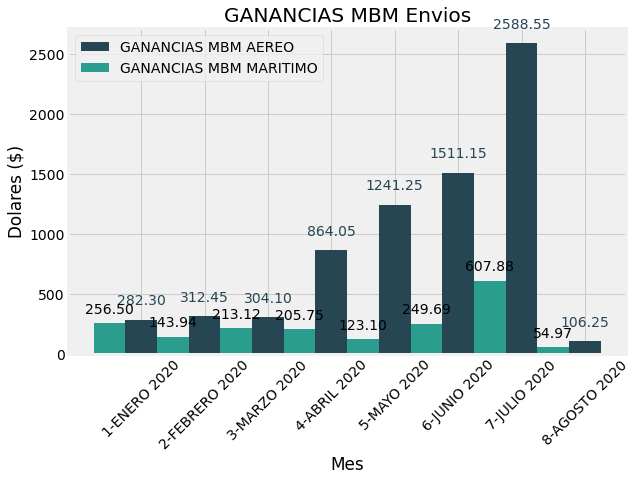

In [5]:

x_indexes = np.arange(len(mbm_resumen_aereo.MES))
width = 0.50
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.bar(x_indexes, mbm_resumen_aereo['GANANCIAS MBM ($)'], width = width,color='#264653', label='GANANCIAS MBM AEREO')
plt.bar(x_indexes - width, mbm_resumen_maritimo['GANANCIAS MBM ($)'], width = width,color='#2A9D8F', label='GANANCIAS MBM MARITIMO')
plt.ylabel('Dolares ($)')
plt.xlabel('Mes')
plt.title('GANANCIAS MBM Envios')

for x,y in zip(x_indexes, mbm_resumen_aereo['GANANCIAS MBM ($)']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color = "#264653")

for x,y in zip(x_indexes - width, mbm_resumen_maritimo['GANANCIAS MBM ($)']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 


plt.xticks(ticks = x_indexes, labels = mbm_resumen_aereo.MES,rotation=45)
plt.legend()
plt.grid(True)
plt.show()


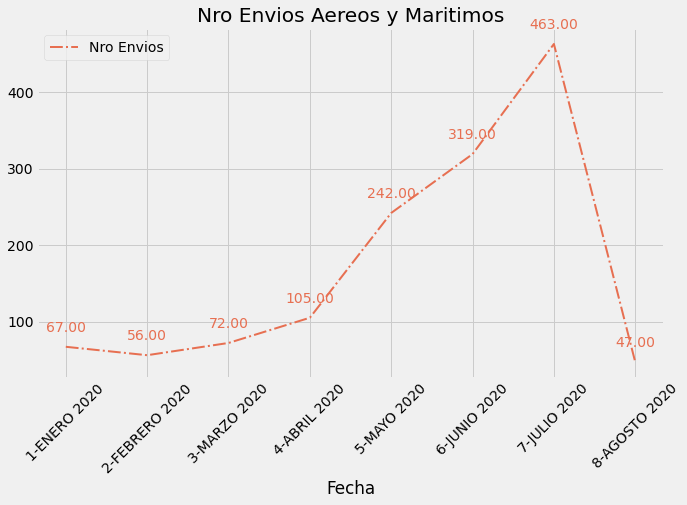

In [6]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.plot(mbm_data_cons.MES, mbm_data_cons['Nro Envios'], color='#e76f51', linestyle = '-.',linewidth=2, label='Nro Envios')
plt.xlabel('Fecha')
plt.title('Nro Envios Aereos y Maritimos')

for x,y in zip(mbm_data_cons.MES, mbm_data_cons['Nro Envios']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color = "#e76f51")

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

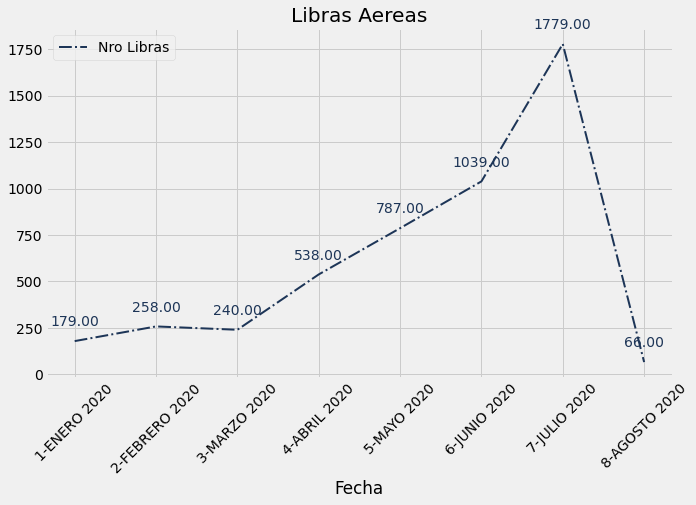

In [7]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.plot(mbm_data_cons.MES, mbm_data_cons['Libras'], color='#1d3557', linestyle = '-.',linewidth=2, label='Nro Libras')
plt.xlabel('Fecha')
plt.title('Libras Aereas')
for x,y in zip(mbm_data_cons.MES, mbm_data_cons['Libras']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color = "#1d3557")

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## 5 Mejores Clientes 2020

In [8]:
mbm_data.groupby('CLIENTE').agg({'GANANCIAS MBM': 'sum', 'N° WAREHOUSE' : 'count','GROSS WEIGHT (lb)': 'sum', 'GROSS WEIGHT (Ft)' : 'sum'}).round(decimals = 2).sort_values('GANANCIAS MBM', ascending = False).head()

,GANANCIAS MBM,N° WAREHOUSE,GROSS WEIGHT (lb),GROSS WEIGHT (Ft)
CLIENTE,,,,
Reinaldo Valdes,716.85,113,416.0,0.00
Isai Albert,678.91,52,540.0,20.54
Berardo D'Antonio,537.90,61,235.0,0.00
Karen Gallo\n (CLIENTE DOTERRA),345.95,57,229.0,0.00
Adrian Aguirre,321.10,39,206.0,0.00


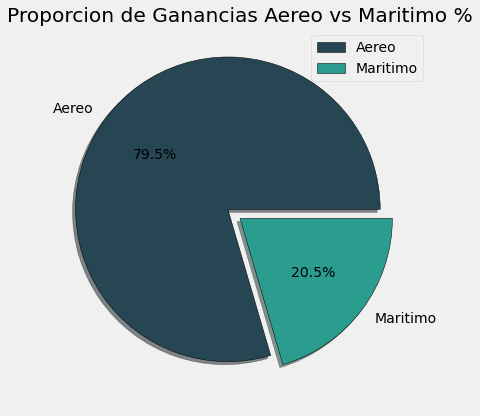

In [9]:
plt.figure(figsize=(7,6))
plt.style.use('fivethirtyeight')
slices = [mbm_resumen_aereo['GANANCIAS MBM ($)'].sum().round(decimals = 2), mbm_resumen_maritimo['GANANCIAS MBM ($)'].sum().round(decimals = 2)]
labels = ['Aereo', 'Maritimo']
explode = [0.1, 0]
colors = ['#264653', '#2A9D8F']
plt.pie(slices, labels = labels, explode = explode, autopct = '%1.1f%%' ,shadow = True,colors = colors,wedgeprops = {'edgecolor':'black'})
plt.legend()
plt.title("Proporcion de Ganancias Aereo vs Maritimo %")
plt.tight_layout()
plt.show()